# The following was achieved:
* I found a away of defining the target that is going to be way more balanced than the one we have now.
* In an ideal I would mantain two heaps to do this, instead of computing like crazy things with a median.

In [86]:
cd ~/Desktop/MyProjects/moneyManager/

/Users/lduque/Desktop/myProjects/moneyManager


In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from marketUtilities.loadTimeSeries import loadTimeSeries

In [88]:
ds = loadTimeSeries('MSFT')[['consolidated']][5000:6000]
ds.head()

,consolidated
date,
2019-01-18 19:51:00,105.68800
2019-01-18 19:52:00,105.67525
2019-01-18 19:53:00,105.70975
2019-01-18 19:54:00,105.73550
2019-01-18 19:55:00,105.76775


In [89]:
ds['difference'] = (ds.consolidated.shift(-20)-ds.consolidated.shift(-1)) # this is our current target.
ds['target']=ds.difference>0

In [90]:
memory = []
values = ds.difference.values
target = []
memSize = 120

for v in values:
    if len(memory)<memSize:
        target.append(v>0)
        memory.append(v)
    else:
        target.append(v>np.median(memory))
        memory.pop(0)
        memory.append(v)

In [91]:
ds['new_target']=target
ds

,consolidated,difference,target,new_target
date,,,,
2019-01-18 19:51:00,105.68800,0.19175,True,True
2019-01-18 19:52:00,105.67525,0.20425,True,True
2019-01-18 19:53:00,105.70975,0.22575,True,True
2019-01-18 19:54:00,105.73550,0.19825,True,True
2019-01-18 19:55:00,105.76775,0.21425,True,True
...,...,...,...,...
2019-01-24 16:56:00,104.60975,NaN,False,False
2019-01-24 16:57:00,104.61100,NaN,False,False
2019-01-24 16:58:00,104.62475,NaN,False,False


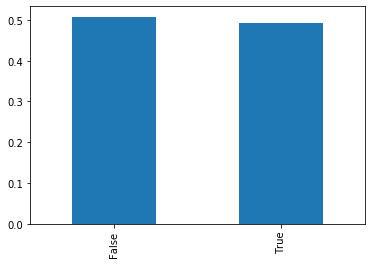

In [92]:
(ds.new_target.value_counts()/len(ds)).plot.bar()

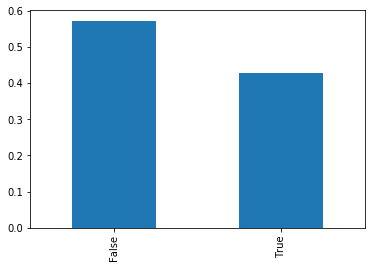

In [93]:
(ds.target.value_counts()/len(ds)).plot.bar()